<hr style="border:0.02in solid gray"> </hr>

# <font color='midnightblue'> ROAD TRAFFIC ACCIDENT DATASET OF ADDIS ABABA CITY
    
<hr style="border:0.02in solid gray"> </hr>

🧾**Description:** This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

source of dataset - Click Here 

🧭 **Problem Statement:** The target feature is **Accident\_severity** which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be **f1-score**


<hr style="border:0.018in solid gray"> </hr>

## <font color='midnightblue'> Libraries
    
<hr style="border:0.018in solid gray"> </hr>

In [1]:
import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import matplotlib
from collections import Counter
import joblib
import shap

#from dataprep.eda import plot, plot_correlation, create_report, plot_missing
from IPython.display import display_html
from EDA import DataExplorer as de

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('seaborn')

d:\Escritorio\Projects\MGP\MGP1_RTA_Severity_prediction\venv\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

d:\Escritorio\Projects\MGP\MGP1_RTA_Severity_prediction\venv\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

d:\Escritorio\Projects\MGP\MGP1_RTA_Severity_predictio

<hr style="border:0.018in solid gray"> </hr>

## <font color='midnightblue'> Data
    
<hr style="border:0.018in solid gray"> </hr>

In [2]:
df = pd.read_csv("data/RTA dataset.csv")

In [3]:
display_html(df.head(2), df.tail(2), df.sample(2))

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,No defect,Outside rural areas,Undivided Two way,Tangent road with mountainous terrain and,O Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7907,21:39:00,Tuesday,Under 18,Male,Junior high school,Employee,Below 1yr,NaN,NaN,NaN,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Darkness - lights lit,Normal,Vehicle with vehicle collision,1,2,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Driving to the left,Slight Injury
217,8:43:00,Wednesday,31-50,Male,Above high school,Other,2-5yr,Other,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Wet or damp,Daylight,Raining,Vehicle with vehicle collision,2,2,Turnover,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [4]:
# ProfileReport(df)
# create_report(df)

In [5]:
df.shape

(12316, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [9]:
# calculate the missing values count and convert it to a dataframe
missing_vals = pd.DataFrame(df.isna().sum(), columns=['missing'])

In [10]:
# concatenate the two dataframes
result = pd.concat([df.describe(include=['O']).T, missing_vals], axis=1)

In [11]:
result

,count,unique,top,freq,missing
time,12316,1074,15:30:00,120,0
day_of_week,12316,7,Friday,2041,0
driver_age,12316,5,18-30,4271,0
driver_sex,12316,3,Male,11437,0
educational_level,11575,7,Junior high school,7619,741
vehicle_driver_relation,11737,4,Employee,9627,579
driving_experience,11487,7,5-10yr,3363,829
vehicle_type,11366,17,Automobile,3205,950
vehicle_owner,11834,4,Owner,10459,482
service_year,8388,6,Unknown,2883,3928


In [12]:
de.generate_data_description_table(df)

,count,mean,std,min,25%,50%,75%,max
casualties,12316.000000,1.548149,1.007179,1.000000,1.000000,1.000000,2.000000,8.000000
vehicles_involved,12316.000000,2.040679,0.688790,1.000000,2.000000,2.000000,2.000000,7.000000


In [13]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [14]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique value in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique value in educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Unique value

In [15]:
# df = df.replace('na', np.nan)

In [16]:
class_count = pd.value_counts(df['accident_severity'], sort = True).sort_index()

In [17]:
fig = go.Figure(data=[go.Pie(labels=['Fatal injury', 'Serious Injury', 'Slight Injury'], 
                                    values=class_count, 
                                    pull=[0.1, 0, 0], 
                                    opacity=0.85)])
fig.update_layout(
    title_text="Composition of Accident Severity")
fig.show()

In [18]:
fig = px.histogram(df, x="accident_severity",
                   title='Composition of Accident Severity',
                   opacity=0.85, # represent bars with log scale
                   color = 'accident_severity', text_auto=True)

fig.update_layout({
"plot_bgcolor": "rgba(0, 0, 0, 0)",
"paper_bgcolor": "rgba(0, 0, 0, 0)",
})

fig.show()

In [19]:
fig = px.treemap(df, path=['accident_cause'], width=800, height=400)
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=50))

fig.show()

In [20]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# date (day-month-year) time
df["time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

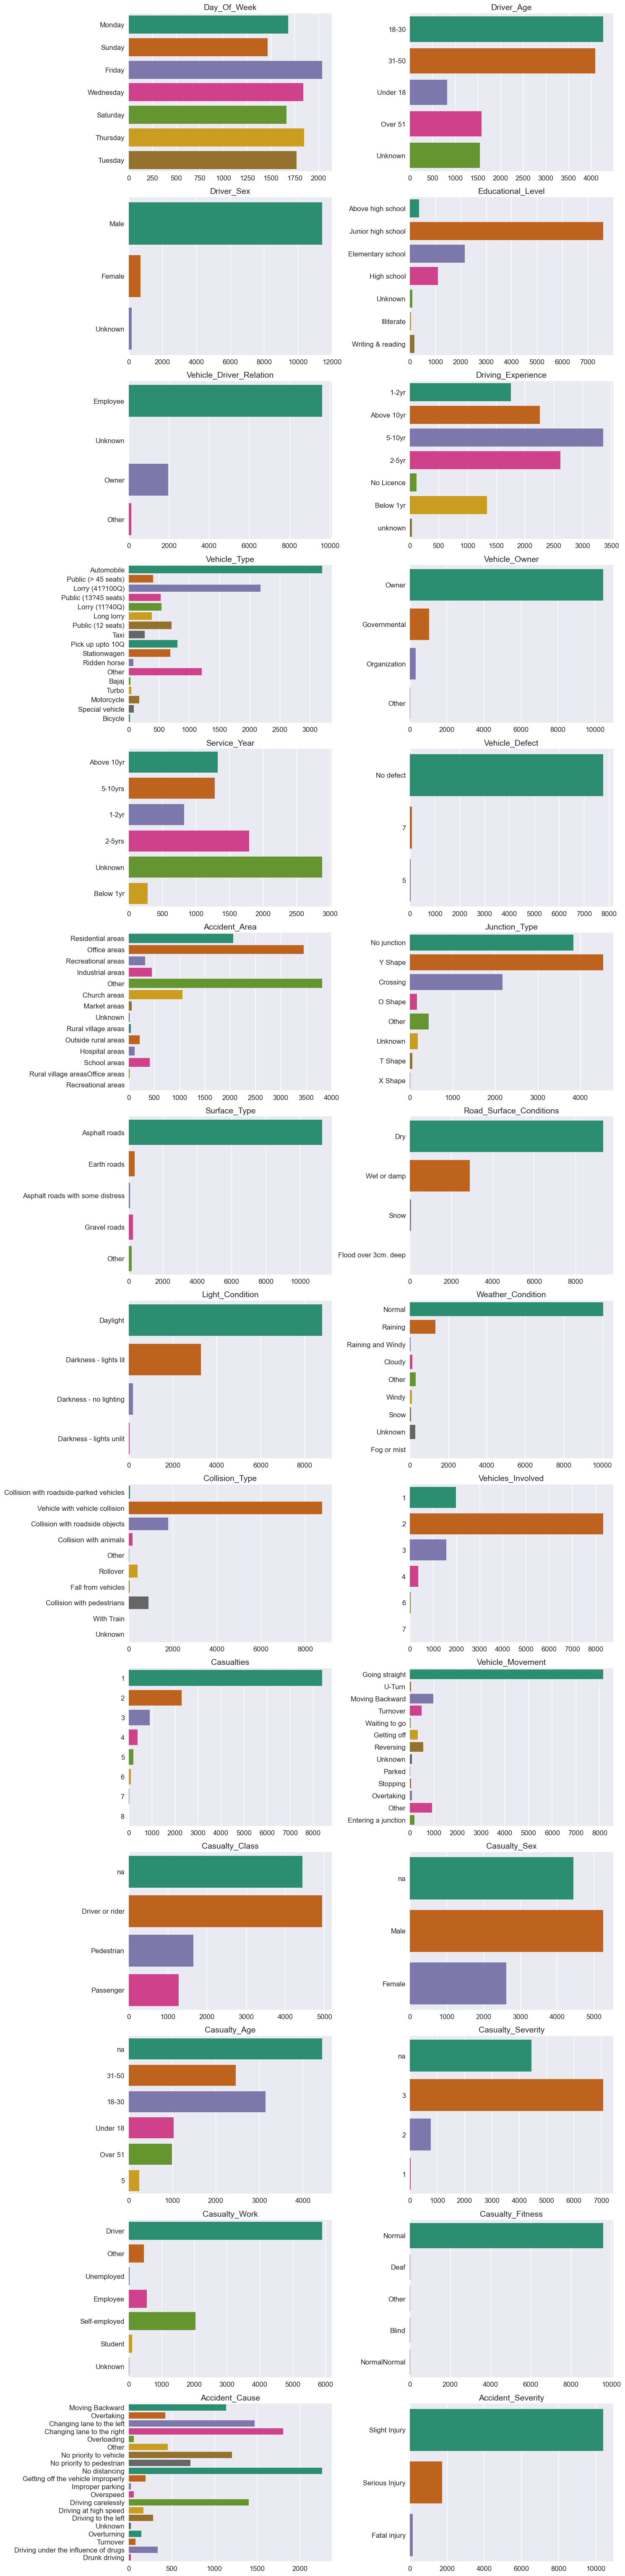

In [21]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

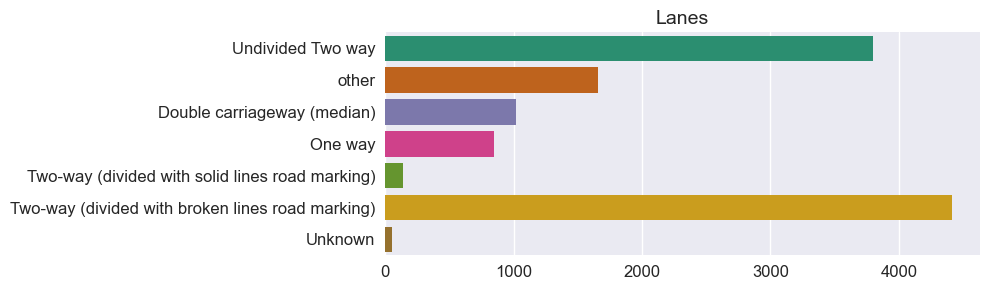

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

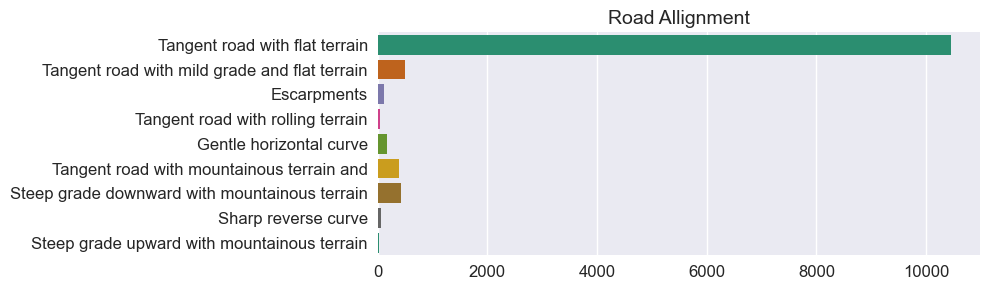

In [23]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

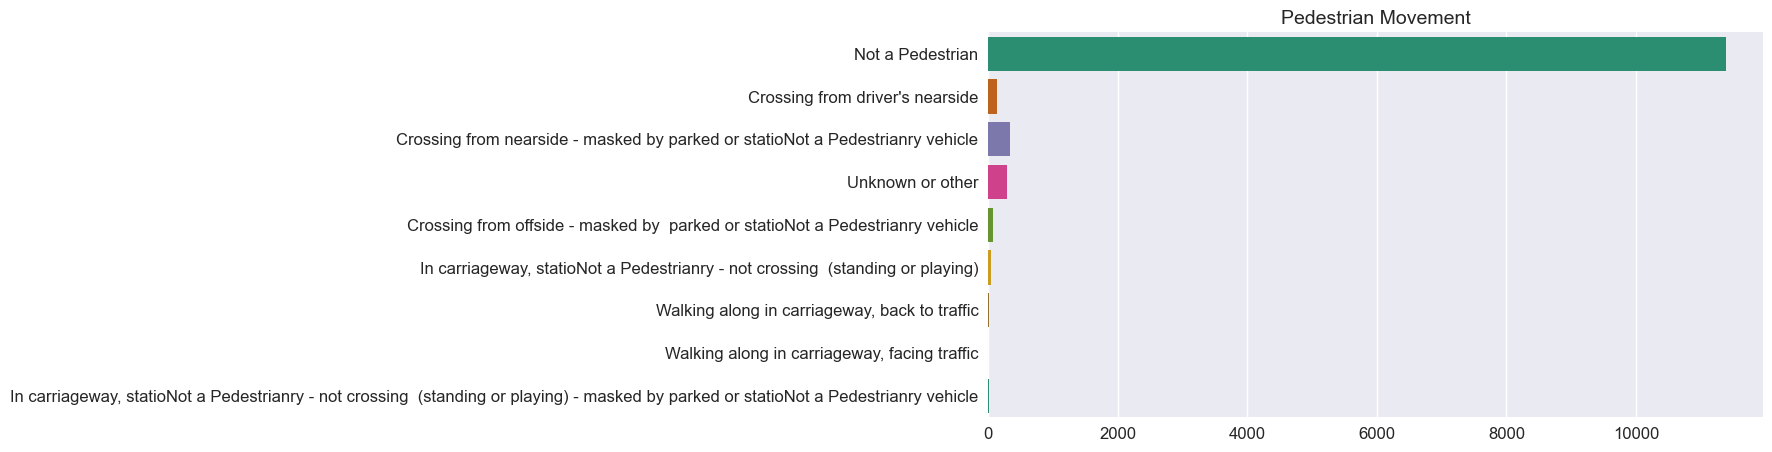

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

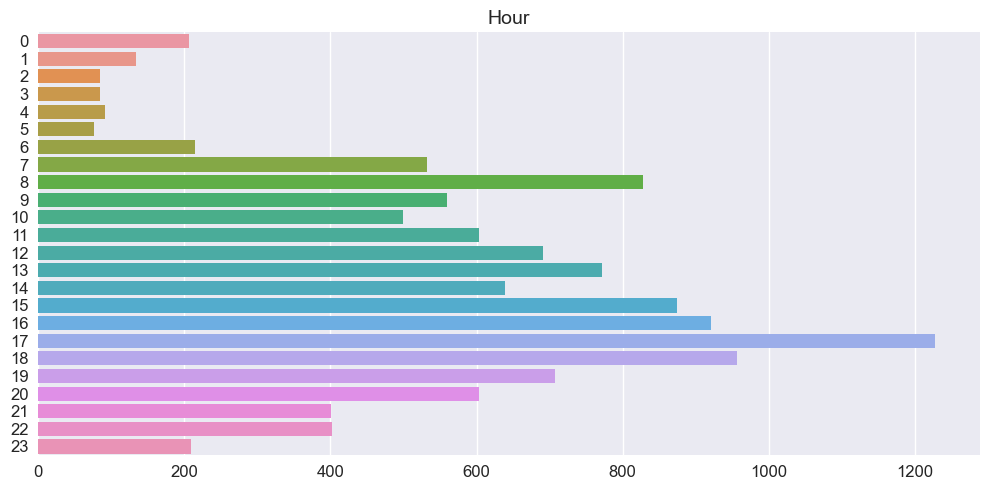

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

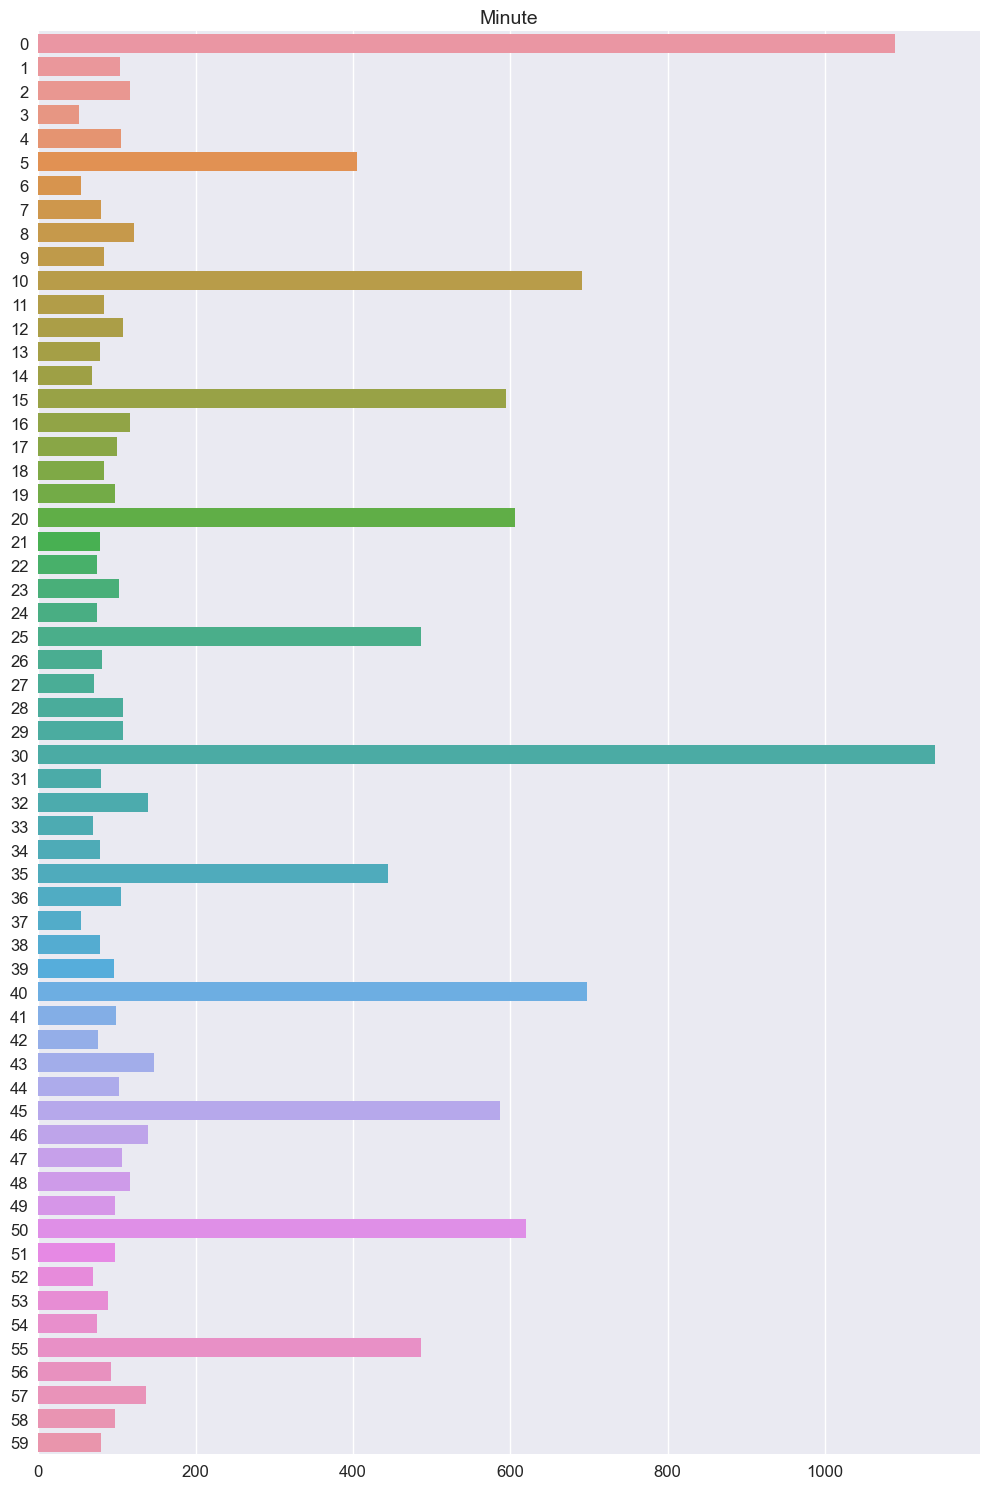

In [26]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#91C7B1'>💡 Observations:</font></h3>

**Most of the accidents:**
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

**Most of the drivers:**
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

**Most of the drivers have met with accident on:**
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

**Most of the casualties:**
* happened to physically fit male drivers
* are of severity 3

**The conditions on which most of the drivers met with the accident are:**
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.
    
</div>

<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#91C7B1'>💡 Observations:</font></h3>
    
* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

In [27]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [28]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

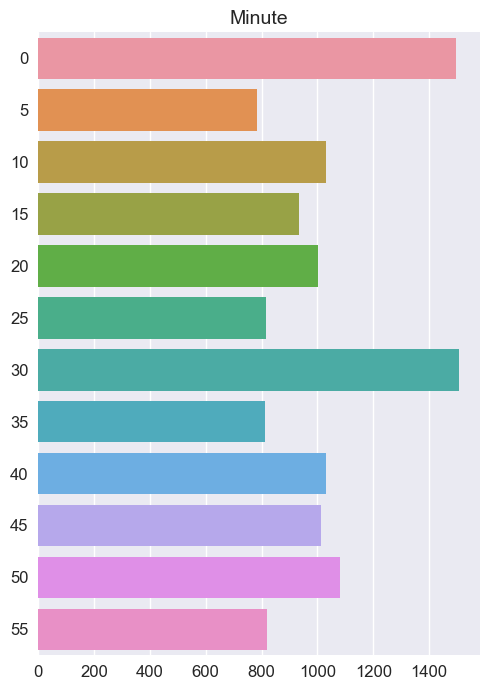

In [29]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#91C7B1'>💡 Observations:</font></h3>
    
* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

## Testing Hypothesis

In [30]:
hypothesis_df = df.copy(deep=True)

<div class="alert alert-block alert-info" style="margin-top: 20px">
❗️The copy() method performs a shallow copy, which means that the new object references the same data 
as the original object. This can cause issues if the original object is modified, as the changes will 
also affect the new object.

To avoid this issue, the deep=True parameter is used to perform a deep copy, which means that a completely
new object is created with its own data. This ensures that any changes made to the original object do not 
affect the new object.
</div>

<div style="border-radius:10px; border:#9E2B25 solid; padding: 15px; background-color: #FFF8F0; font-size:100%; text-align:left">
<h3 align="left"><font color='#9E2B25'> Hypothesis 1: Which of both genders is actually dangerous in Driving?</font></h3>
    
<font color='#9E2B25'><b>Calculating the Conditional Probability; Probability of an Accident Happen When the Driver is a Female and Repeating the Calculations when it's Male.<br>
P(Gender = Male | Severity = 2) P(Gender = Female | Severity = 2)</b></font>

In [31]:
Counter(df["driver_sex"])

Counter({'Male': 11437, 'Female': 701, 'Unknown': 178})

In [32]:
((hypothesis_df.groupby(['driver_sex']).size() / hypothesis_df["driver_sex"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

driver_sex
Accidents(in %) Caused by Female      5.691783
Accidents(in %) Caused by Male       92.862943
Accidents(in %) Caused by Unknown     1.445274
dtype: float64

In [33]:
male_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Male']
female_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Female']

fig = go.Figure()

fig.add_trace(go.Bar(x=male_df.accident_cause.unique(), y=male_df.accident_cause.value_counts().values, 
                     name='Male'))
fig.add_trace(go.Bar(x=female_df.accident_cause.unique(), y=female_df.accident_cause.value_counts().values, 
                     name='Female'))

fig.update_layout(title='Accident Cause by Driver Sex',
                  xaxis_title='Accident Cause', yaxis_title='Count',
                  barmode='group', bargap=0.1, bargroupgap=0.2)

fig.show()

In [34]:
injury_by_sex = pd.crosstab(index=hypothesis_df['driver_sex'].loc[hypothesis_df['driver_sex'] !="Unknown"], columns=df['accident_severity']
                 , margins=True)
injury_by_sex

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
driver_sex,,,,
Female,5,104,592,701
Male,152,1621,9664,11437
All,157,1725,10256,12138


$P(Fatal | Male) = P(Fatal | Female)?$

In [35]:
print("P(Fatal | Female) = {:.2f}%".format(injury_by_sex.iloc[0,0] / injury_by_sex.iloc[0, 3]*100))
print("P(Fatal | Male) = {:.2f}%\n".format(injury_by_sex.iloc[1,0] / injury_by_sex.iloc[1, 3]*100))

P(Fatal | Female) = 0.71%
P(Fatal | Male) = 1.33%



$\therefore P(Fatal | Male) \approx 2P(Fatal | Female)$

In [36]:
print("P(Serious | Female) = {:.2f}%".format(injury_by_sex.iloc[0,1] / injury_by_sex.iloc[0, 3]*100))
print("P(Serious | Male) = {:.2f}%\n".format(injury_by_sex.iloc[1,1] / injury_by_sex.iloc[1, 3]*100))

P(Serious | Female) = 14.84%
P(Serious | Male) = 14.17%



In [37]:
print("P(Slight | Female) = {:.2f}%".format(injury_by_sex.iloc[0,2] / injury_by_sex.iloc[0, 3]*100))
print("P(Slight | Male) = {:.2f}%\n".format(injury_by_sex.iloc[1,2] / injury_by_sex.iloc[1, 3]*100))

P(Slight | Female) = 84.45%
P(Slight | Male) = 84.50%



In [38]:
print("P(Gender = Female | Severity = Fatal) = {:.2f}%".format(injury_by_sex.iloc[0,0]/injury_by_sex.iloc[2,0]*100))
print("P(Gender = Male   | Severity = Fatal) = {:.2f}%\n".format(injury_by_sex.iloc[1,0]/injury_by_sex.iloc[2, 0]*100))

print("P(Gender = Female | Severity = Serious Injury) = {:.2f}%".format(injury_by_sex.iloc[0,1]/injury_by_sex.iloc[2,1]*100))
print("P(Gender = Male   | Severity = Serious Injury) = {:.2f}%\n".format(injury_by_sex.iloc[1,1]/injury_by_sex.iloc[2,1]*100))

print("P(Gender = Female | Severity = Slight Injury) = {:.2f}%".format(injury_by_sex.iloc[0,2]/injury_by_sex.iloc[2,2]*100))
print("P(Gender = Male   | Severity = Slight Injury) = {:.2f}%".format(injury_by_sex.iloc[1,2]/injury_by_sex.iloc[2,2]*100))

P(Gender = Female | Severity = Fatal) = 3.18%
P(Gender = Male   | Severity = Fatal) = 96.82%

P(Gender = Female | Severity = Serious Injury) = 6.03%
P(Gender = Male   | Severity = Serious Injury) = 93.97%

P(Gender = Female | Severity = Slight Injury) = 5.77%
P(Gender = Male   | Severity = Slight Injury) = 94.23%


<div style="border-radius:10px; border:#9E2B25 solid; padding: 15px; background-color: #FFF8F0; font-size:100%; text-align:left">
<h3 align="left"><font color='#9E2B25'> Hypothesis 2: Is Speeding is the main Cause for Car Crashes? </font></h3>

In [39]:
accident_cause_by_injury = pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'], margins=True)
accident_cause_by_injury #.sort_values(by = ["All"], ascending = False)

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
accident_cause,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25


In [40]:
accidents_by_high_speed = (accident_cause_by_injury.loc["Overspeed", "All"] + 
                           accident_cause_by_injury.loc["Driving at high speed", "All"])

all_accidents = accident_cause_by_injury.loc["All", "All"]

print(accidents_by_high_speed)
print(all_accidents)

235
12316


In [41]:
print("Injuries(all types due to speeding): " + str(accidents_by_high_speed))
print("In percentage: {:.2f}%".format(accidents_by_high_speed/all_accidents*100))

Injuries(all types due to speeding): 235
In percentage: 1.91%


<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#91C7B1'>💡 Observations:</font></h3>
    
* Speeding is not the main factor for car accidents.

<div style="border-radius:10px; border:#9E2B25 solid; padding: 15px; background-color: #FFF8F0; font-size:100%; text-align:left">
<h3 align="left"><font color='#9E2B25'> Hypothesis 3: Do weekends account for more accidents? </font></h3>

In [42]:
injury_by_day = pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'], margins=True)
injury_by_day

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
day_of_week,,,,
Friday,16,313,1712,2041
Monday,12,204,1465,1681
Saturday,37,245,1384,1666
Sunday,35,190,1242,1467
Thursday,22,272,1557,1851
Tuesday,17,257,1496,1770
Wednesday,19,262,1559,1840
All,158,1743,10415,12316


In [43]:
print('Accident percentage on weekdays:',round(sum([injury_by_day.iloc[i,3] for i in range(0,7) if injury_by_day.index[i] not in ['Saturday','Sunday']])/injury_by_day.iloc[7,3],2))
print('Accident percentage on weekends:',round(sum([injury_by_day.iloc[i,3] for i in range(0,7) if injury_by_day.index[i] in ['Saturday','Sunday']])/injury_by_day.iloc[7,3],2))

Accident percentage on weekdays: 0.75
Accident percentage on weekends: 0.25


<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#91C7B1'>💡 Observations:</font></h3>
    
* Its quite clear that there is no indication of more accidents happening on weekends

<div style="border-radius:10px; border:#9E2B25 solid; padding: 15px; background-color: #FFF8F0; font-size:100%; text-align:left">
<h3 align="left"><font color='#9E2B25'> Hypothesis 4: Are there more dangerous injuries at night than in day? </font></h3>

In [44]:
injury_by_light_condition = pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'], margins=True)
injury_by_light_condition

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
light_condition,,,,
Darkness - lights lit,66,465,2755,3286
Darkness - lights unlit,0,7,33,40
Darkness - no lighting,5,49,138,192
Daylight,87,1222,7489,8798
All,158,1743,10415,12316


In [45]:
sum(injury_by_light_condition.iloc[0:3, 0] + injury_by_light_condition.iloc[0:3, 1])

592

In [46]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += injury_by_light_condition.iloc[j,i]

r = sol/(sum(injury_by_light_condition.iloc[i,3] for i in [0,1,2]))
print('Dangerous injuries at night:',round(r,2),'%')

r = sum(injury_by_light_condition.iloc[i,2] for i in [0,1,2])/sum(injury_by_light_condition.iloc[i,3] for i in [0,1,2])
print('Slight injuries at night:',round(r,2),'%')

Dangerous injuries at night: 0.17 %
Slight injuries at night: 0.83 %


<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#91C7B1'>💡 Observations:</font></h3>

- Although it does that in daylight there are more number of accidents but the dangerous injuries percentage are almost same either be it day or night.

<div style="border-radius:10px; border:#9E2B25 solid; padding: 15px; background-color: #FFF8F0; font-size:100%; text-align:left">
<h3 align="left"><font color='#9E2B25'> Hypothesis 5: More accidents under some specific non-normal weather? </font></h3>
    
Without considering normal weather

In [47]:
injury_by_weather = pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'], margins=True)
injury_by_weather.drop(['Normal','All'],axis=0)

accident_severity,Fatal injury,Serious Injury,Slight Injury,All
weather_condition,,,,
Cloudy,0,8,117,125
Fog or mist,0,1,9,10
Other,0,28,268,296
Raining,23,158,1150,1331
Raining and Windy,0,2,38,40
Snow,0,5,56,61
Unknown,0,51,241,292
Windy,0,16,82,98


<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#91C7B1'>💡 Observations:</font></h3>

- Without any analysis we can clearly see that rainy weather causes more accident and also all the fatal injuries have occured under non-normal conditions are there in rainy weather

# ⚙️ Preprocessing

In [48]:
df.isna().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
hour    

In [49]:
def fill_na_with_distribution(df, cols):
    for col in cols:
        dist = df[col].value_counts(normalize=True)
        missing = df[col].isnull()
        if missing.sum() > 0:
            df.loc[missing, col] = np.random.choice(dist.index, size=missing.sum(), p=dist.values)
    return df

In [50]:
df = fill_na_with_distribution(df, ['casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity'])

In [51]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [52]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [53]:
df.isna().sum() 

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

# ⛓ Preprocessing

In [54]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 29)

In [55]:
display_html(df.head(2), df.tail(2), df.sample(2))

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,5,9,Slight Injury,17,1
1,1,1,1,4,3,11,3,2,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,17,1


,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
12314,3,0,0,4,3,5,3,1,6,4,7,1,0,0,0,2,8,1,0,4,3,2,5,3,5,5,Slight Injury,13,11
12315,3,0,1,4,2,7,3,1,5,4,7,2,0,0,0,2,8,1,0,8,2,0,2,2,1,1,Slight Injury,13,11


,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
4010,3,3,1,4,4,0,3,5,7,2,5,7,0,0,3,7,2,1,1,4,3,2,5,3,5,3,Slight Injury,16,0
4408,0,1,2,4,0,0,3,5,6,2,5,7,0,0,3,2,8,1,0,4,2,0,3,2,2,5,Slight Injury,11,6


In [56]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

ValueError: could not convert string to float: 'Slight Injury'

<Figure size 2200x1700 with 0 Axes>

# Upsampling

In [58]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import (
    cross_val_score,
    StratifiedKFold,
    KFold,
    train_test_split,
    GridSearchCV,
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [59]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [60]:
# upsampling using smote

counter = Counter(y_train)
counter

Counter({'Slight Injury': 7324, 'Serious Injury': 1191, 'Fatal injury': 106})

In [61]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [62]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

# 🧰 Baseline Modelling

In [63]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [64]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.7940460081190799], 'rf': [0.8005412719891746], 'extree': [0.8108254397834912]}


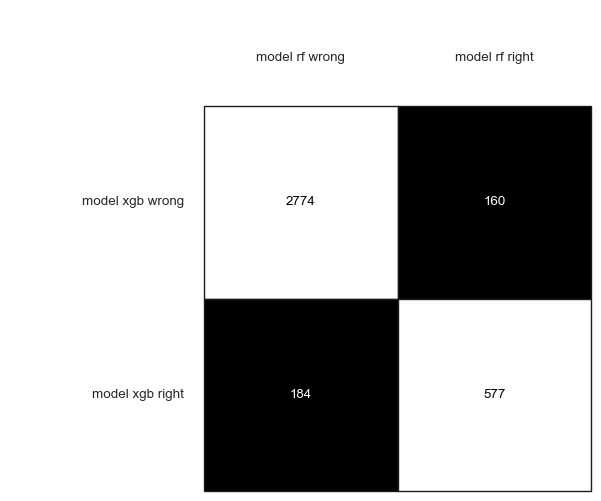

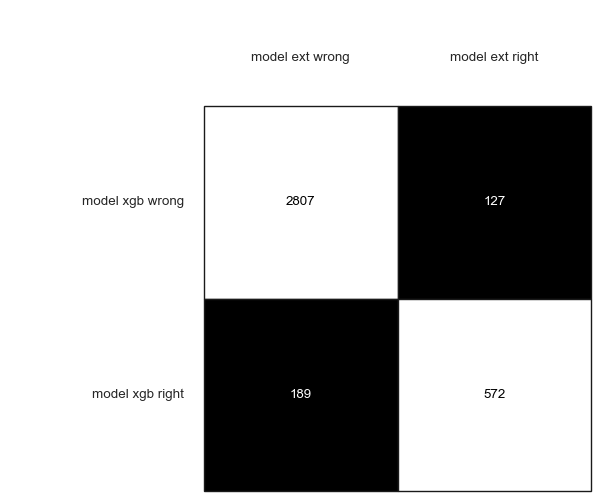

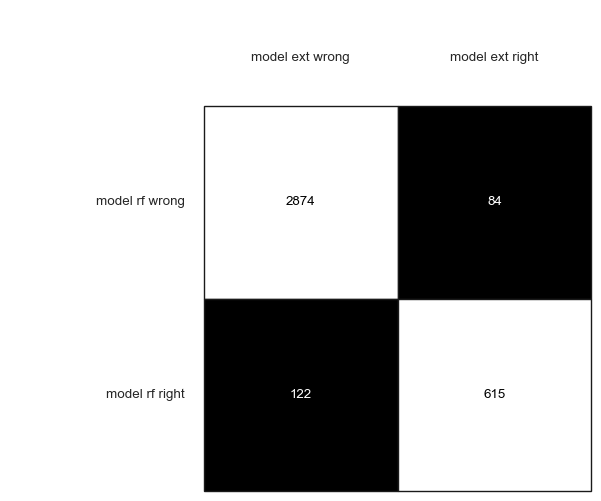

In [65]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test, 
                    y_pred_xgb,
                    y_pred_rf, 
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [66]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [67]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [68]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
model_performance(extree,y_test, y_pred)

# 🛠️ Hyperparameter Tuning

In [70]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.8605205697796566)

In [71]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2},
 0.9165352100669604)

In [72]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [73]:
y_pred_tuned = extree_tuned.predict(X_test)

In [74]:
print(extree_tuned.feature_importances_)

[0.05768219 0.06014765 0.01771605 0.02854101 0.0443627  0.03499882
 0.01981305 0.03301401 0.02742451 0.03566222 0.01409841 0.04555945
 0.01101774 0.04702445 0.06630275 0.01737486 0.03441032 0.0689295
 0.06002149 0.0216126  0.02913992 0.03238319 0.02815585 0.02146227
 0.01075972 0.0404983  0.04110451 0.05078245]


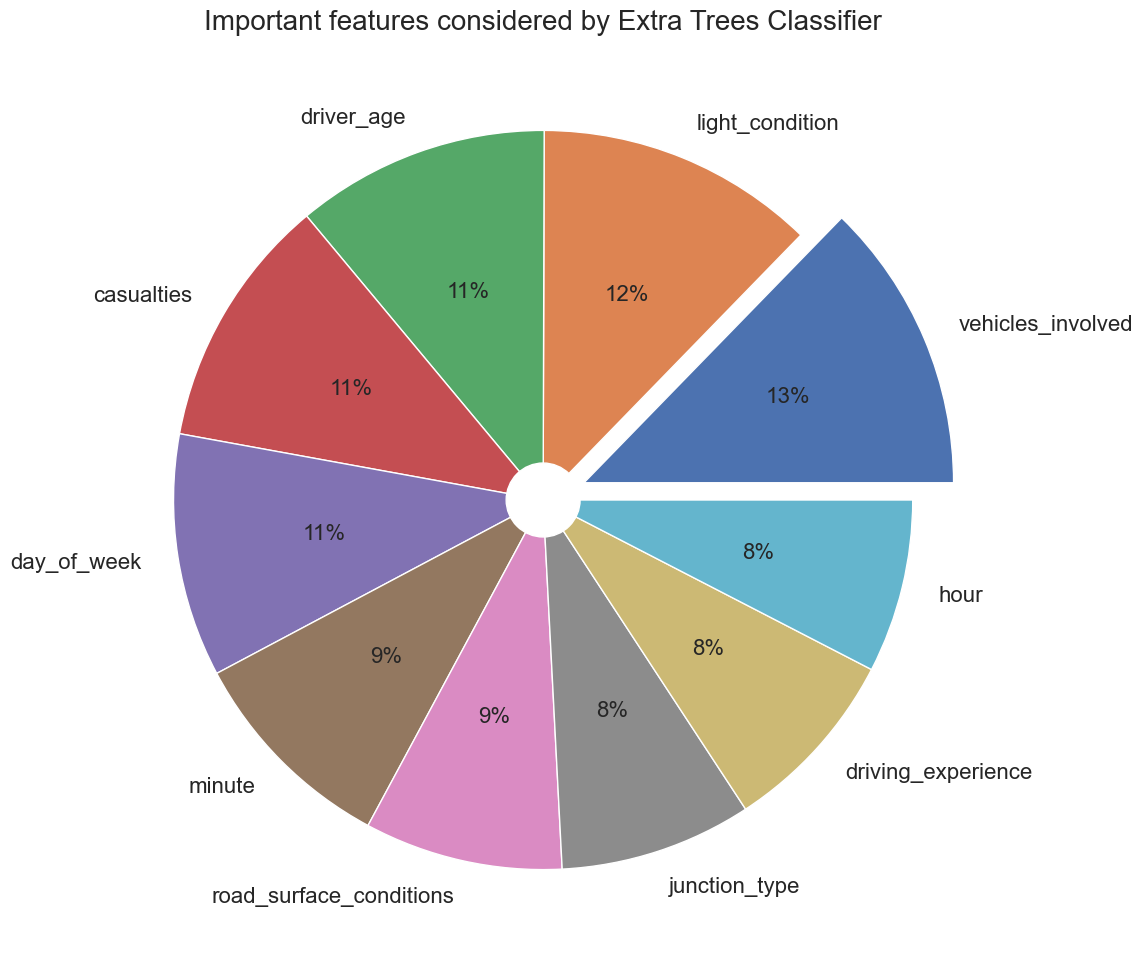

In [75]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

# Explainable AI

In [76]:
shap.initjs()

In [77]:
X_sample = X_train.sample(100)
X_sample

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,hour,minute
687,4,3,1,4,1,13,3,5,2,2,5,1,0,3,3,4,7,1,0,2,0,1,1,2,5,11,13,0
11256,3,0,1,4,0,14,2,1,7,3,5,1,0,0,3,2,6,1,0,2,0,0,3,1,5,12,17,1
19683,3,0,1,4,1,5,3,5,7,5,5,1,0,0,1,2,8,0,1,8,0,1,0,2,5,0,22,5
20383,3,0,1,4,2,8,3,3,6,2,2,7,0,2,3,3,8,0,0,4,0,0,0,2,5,9,12,10
5860,6,1,1,4,3,7,3,5,6,2,6,7,0,0,3,2,8,1,1,2,0,1,0,1,5,13,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19139,4,2,1,3,1,7,3,1,7,2,5,2,0,0,0,2,8,0,0,2,1,1,3,2,5,1,4,9
12376,2,0,1,3,2,8,3,4,6,1,0,7,0,3,3,4,3,1,3,1,0,1,0,2,5,1,18,10
4981,1,1,1,4,1,7,0,5,9,0,5,1,0,3,3,2,2,1,0,7,3,2,5,3,5,10,21,5
14480,2,1,1,3,2,0,3,1,6,3,5,7,0,2,3,3,6,0,2,3,3,2,5,3,5,10,18,7


In [80]:
shap_values = shap.TreeExplainer(extree_tuned).shap_values(X_sample)

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [79]:
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

NameError: name 'shap_values' is not defined

In [ ]:
print(y_pred_tuned[50])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

In [ ]:
i=13
print(y_pred_tuned[i])
shap.force_plot(shap.TreeExplainer(extree_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

In [ ]:
print(y_pred_tuned[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(extree_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

In [ ]:
shap.dependence_plot('day_of_week', shap_values[2], X_sample)

In [ ]:
shap.dependence_plot('driver_age', shap_values[2], X_sample)

In [ ]:
print(y_pred_tuned[10])
shap.decision_plot(shap.TreeExplainer(extree_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())

In [ ]:
# upsampling using smote
y = df["accident_severity"]
X = df.drop(["accident_severity"], axis=1)

counter = Counter(y)

for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({per:.2f}%)")

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

In [ ]:
names = []
results = []
for name, model in models:
    fold = KFold(n_splits=10)
    score = cross_val_score(model, X, y, cv=fold, scoring='accuracy')
    names.append(name)
    results.append(score)

In [ ]:
plotdict = dict(zip(names, results))
for k, v in plotdict.items():
    print(f"{k}, {round(v.mean(), 5)}")

In [ ]:
top10 = ['hour', "casualties", "day_of_week", "accident_cause", "vehicles_involved", "vehicle_type", 
         "driver_age", "accident_area", "driving_experience", "lanes"]

In [ ]:
df10 = df[top10]
df10

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train_new, y_train_new)

In [ ]:
y_pred_new = model.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy score: ", score_new)

In [ ]:
joblib.dump(model, 'random_forest_final.joblib')

In [ ]:
df.shape

In [ ]:
def imbalanced_features(df):
    mod_imb=[] # moderately imbalanced
    hi_imb=[] # highly imbalanced

    for col in df.columns:
        try:
            if (df[col].value_counts()/df.shape[0]).max() > 0.9:
                hi_imb.append(col)
            elif (df[col].value_counts()/df.shape[0]).max() > 0.7 and col not in hi_imb:
                mod_imb.append(col)
        except Exception as e:
            print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

    print("="*20, "\033[1m Imbalanced features\033[0m", "="*20)
    print("No of moderately imbalanced features (75%+ data on a single class): ", len(mod_imb), "\n")
    print(mod_imb, "\n")
    print("No of highly imbalanced features (90%+ data on a single class): ", len(hi_imb), "\n")
    print(hi_imb)
imbalanced_features(df)

In [ ]:
# upsampling using smote
y = df['accident_severity']
X = df.drop('accident_severity', axis=1)

counter = Counter(y)

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

In [ ]:
df = pd.concat([X, y], axis=1)
print("Upsampled data shape: ", df.shape)

In [ ]:
# selecting a good baseline model using cross validation

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

In [ ]:
names = []
results = []
for name, model in models:
    fold = KFold(n_splits=10)
    score = cross_val_score(model, X, y, cv=fold, scoring='accuracy')
    names.append(name)
    results.append(score)

In [ ]:
plotdict = dict(zip(names, results))

for k,v in plotdict.items():
    print(f"{k}: {round(v.mean(),5)}")

In [ ]:
model = RandomForestClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# fitting model
model.fit(X_train, y_train)

In [ ]:
# predicting
y_pred = model.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

In [ ]:
# getting feature importance
model.feature_importances_

In [ ]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = model.feature_importances_
plt.figure(figsize=(10, 12))
sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');

In [ ]:
# selecting top 10 features
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

In [ ]:
df_top10 = df[['lanes',
 'minute',
 'casualties',
 'day_of_week',
 'vehicles_involved',
 'accident_cause',
 'vehicle_type',
 'driver_age',
 'lanes',
 'driving_experience']]
df_top10

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

In [ ]:
# fitting model
model.fit(X_train_new, y_train_new)

In [ ]:
# predicting
y_pred_new = model.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)

In [ ]:
joblib.dump(model, 'random_forest_final.joblib')

<div style="border-radius:10px; border:#91C7B1 solid; padding: 15px; background-color: #f1f7ed; font-size:100%; text-align:left">
<h3 align="left"><font color='#000000'>💡 Observations:</font></h3>
    
A

<div style="border-radius:10px; border:#9E2B25 solid; padding: 15px; background-color: #FFF8F0; font-size:100%; text-align:left">
<h3 align="left"><font color='#000000'>💡 Observations:</font></h3>
    
A

<div style="border-radius:10px; border:#5EB1BF solid; padding: 15px; background-color: #CDEDF6; font-size:100%; text-align:left">
<h3 align="left"><font color='#000000'>💡 Observations:</font></h3>
    
A

<div style="border-radius:10px; border:#028090 solid; padding: 15px; background-color: #E4FDE1; font-size:100%; text-align:left">
<h3 align="left"><font color='#000000'>💡 Observations:</font></h3>
   
A